## Assignment 1
#### Dataset california

#### a.) Splitting dataset

In [1]:
# Memanggil dataset
import pandas as pd

california_dataset = pd.read_csv("california_dataset.csv")
california_dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,house_price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [2]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(california_dataset, test_size=0.2, random_state=42)

#### b.) Lihat distribusi data melalui plot

Visualisasi untuk kolom: MedInc


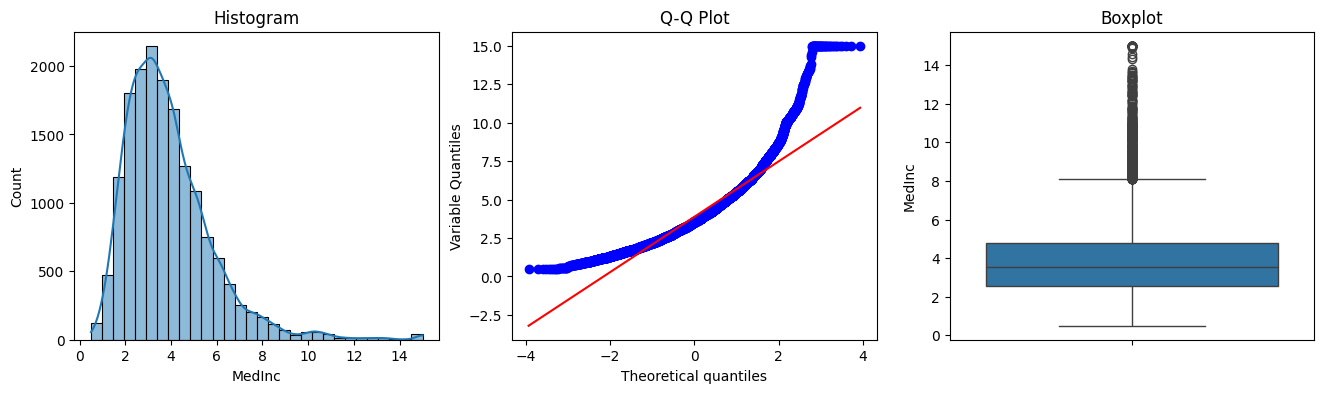

Visualisasi untuk kolom: HouseAge


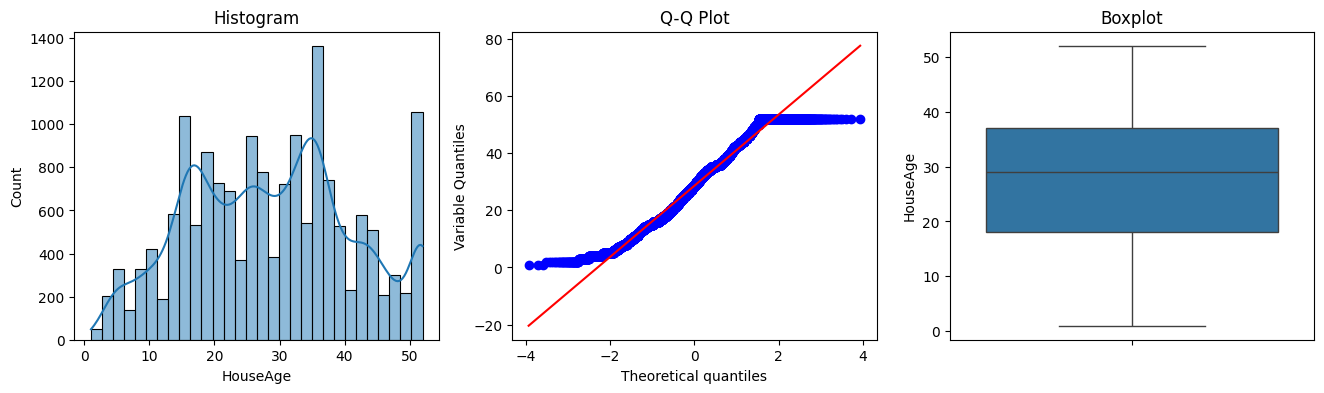

Visualisasi untuk kolom: AveRooms


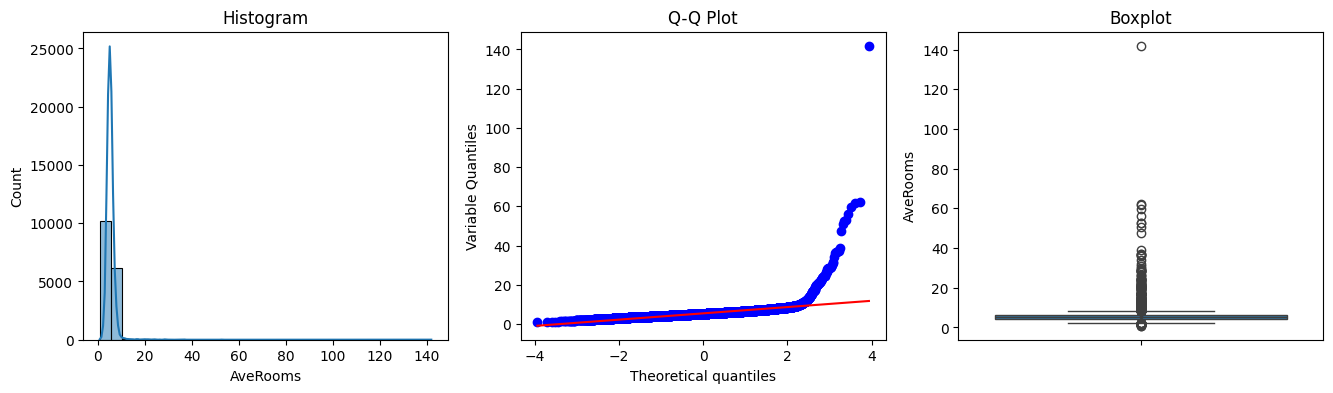

Visualisasi untuk kolom: AveBedrms


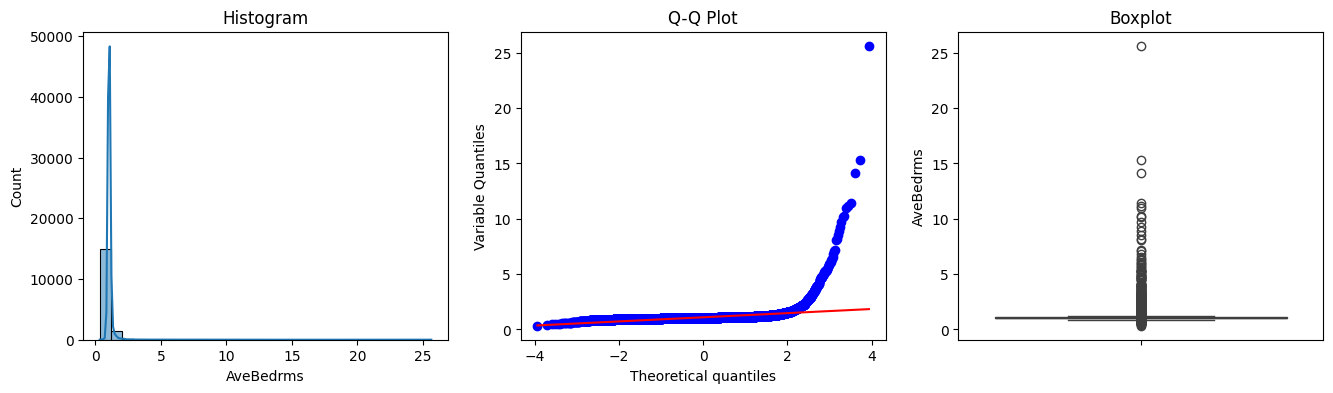

Visualisasi untuk kolom: AveOccup


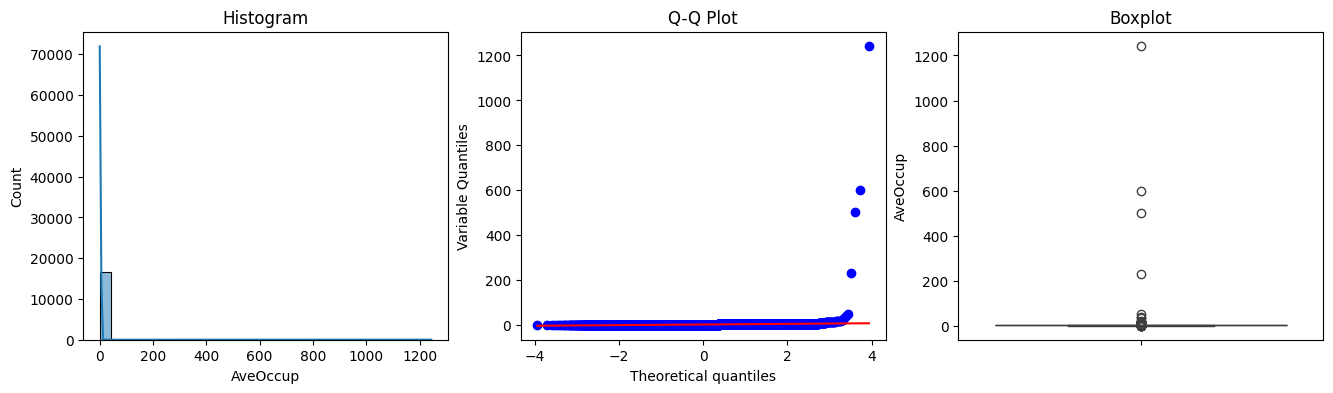

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

# Daftar kolom yang akan diuji
columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup']

def check_plot(df, variable):
    plt.figure(figsize=(16, 4))  # Tentukan ukuran gambar
    
    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title('Histogram')

    # Q-Q Plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel("Variable Quantiles")
    plt.title('Q-Q Plot')

    # Boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()
    
for col in columns:
    print(f"Visualisasi untuk kolom: {col}")
    check_plot(train, col)

#### c.) analisa hasil plot

##### Berdasarkan hasil yang telah disajikan dalam bentuk plot, terdapat kolom MedInc, AveRooms, AveBedrms, dan AveOccup yang memiliki outlier. Hal ini bisa dilihat terutama dari boxplot dan QQ plot, yang dimana pada boxplot terdapat beberapa titik yang melebihi atau diluar whisker. Sedangkan, pada QQ plot terdapat beberapa titik yang diluar garis merah

#### d.) Hapus oulier dari plot

In [4]:
columns_with_outlier = ['MedInc', 'AveRooms', 'AveBedrms', 'AveOccup']

def find_outlier_boundary(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)
    return upper_boundary, lower_boundary

outlier_boundaries = {}

for col in columns_with_outlier:
  upper, lower = find_outlier_boundary(train, col)
  outlier_boundaries[col] = {'upper': upper, 'lower': lower}

outlier_boundaries_df = pd.DataFrame(outlier_boundaries)
outlier_boundaries_df

,MedInc,AveRooms,AveBedrms,AveOccup
upper,8.082888,8.474510,1.241107,4.556802
lower,-0.743013,2.038582,0.865748,1.151997


Visualisasi untuk kolom setelah menghilangkan outlier : MedInc


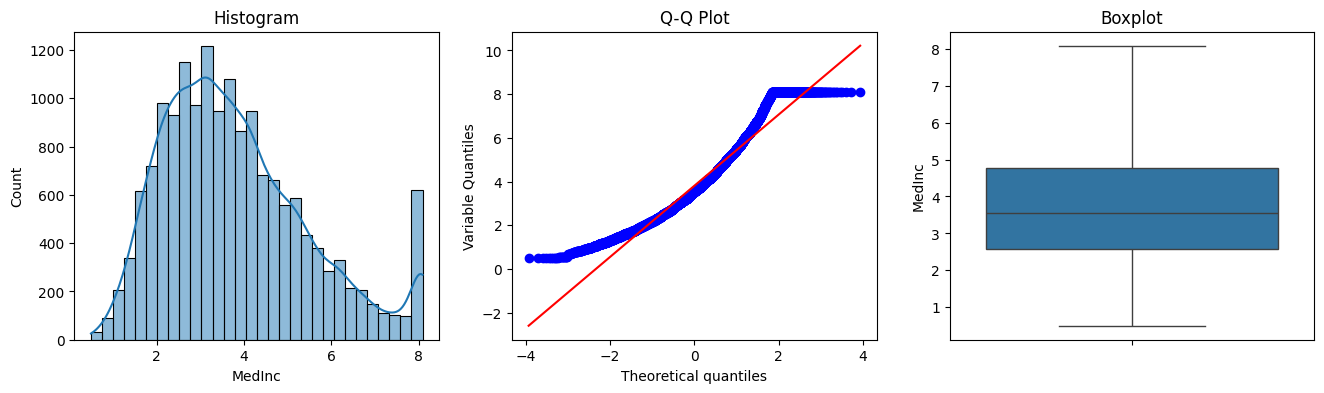

Visualisasi untuk kolom setelah menghilangkan outlier : AveRooms


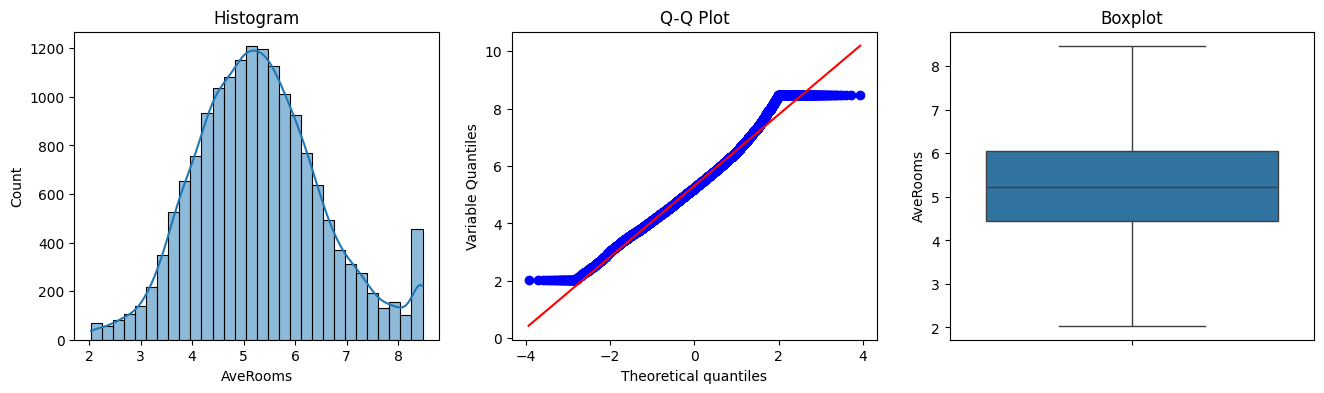

Visualisasi untuk kolom setelah menghilangkan outlier : AveBedrms


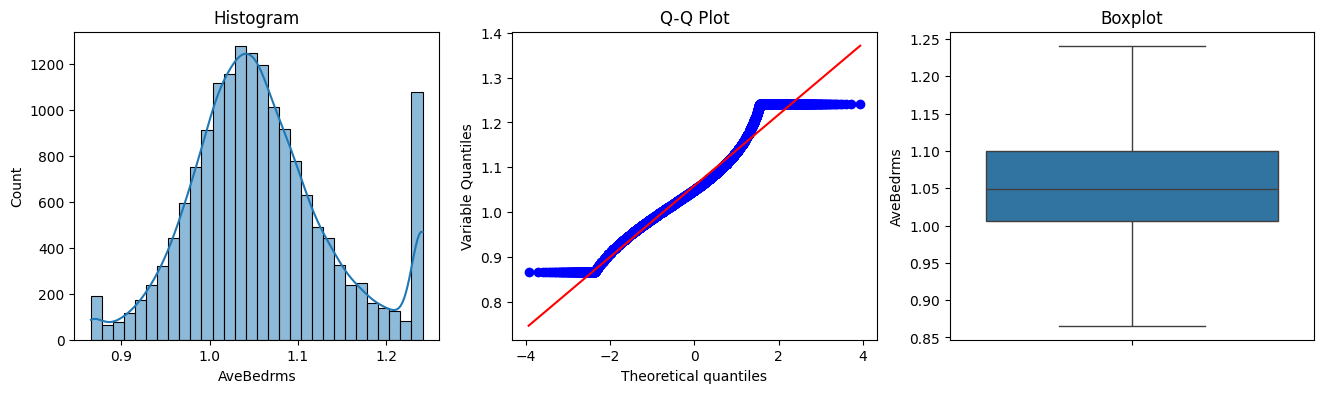

Visualisasi untuk kolom setelah menghilangkan outlier : AveOccup


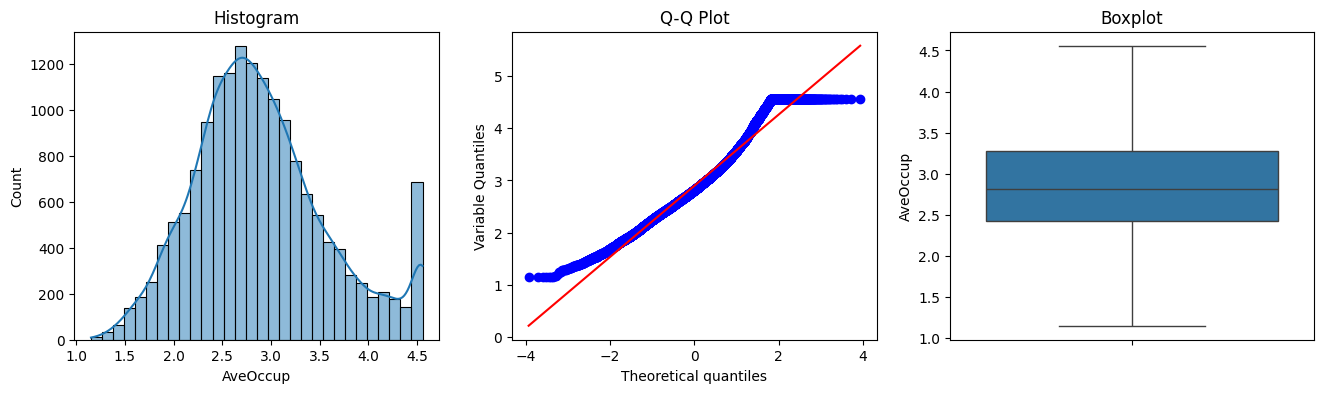

In [5]:
for col in columns_with_outlier:
    train[col] = np.where(train[col] > outlier_boundaries[col]['upper'], outlier_boundaries[col]['upper'],
                                np.where(train[col] < outlier_boundaries[col]['lower'], outlier_boundaries[col]['lower'],
                                         train[col]))

# Menampilkan plot untuk setiap kolom
for col in columns_with_outlier:
    print(f"Visualisasi untuk kolom setelah menghilangkan outlier : {col}")
    check_plot(train, col)

## Assignment 2
#### Dataset company

#### a.) Splitting dataset

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split

company_dataset = pd.read_csv("company.csv")
train_comp, test_comp = train_test_split(company_dataset, test_size=0.2, random_state=42)

In [7]:
company_dataset.head(10)

,Revenue,Size,Rating,Headquarters
0,Unknown / Non-Applicable,1001 to 5000 employees,3.1,"New York, NY"
1,$1 to $2 billion (USD),5001 to 10000 employees,4.2,"Herndon, VA"
2,$100 to $500 million (USD),1001 to 5000 employees,3.8,"Boston, MA"
3,$100 to $500 million (USD),501 to 1000 employees,3.5,"Bad Ragaz, Switzerland"
4,Unknown / Non-Applicable,51 to 200 employees,2.9,"New York, NY"
5,Unknown / Non-Applicable,51 to 200 employees,4.2,"Santa Barbara, CA"
6,$10+ billion (USD),10000+ employees,3.9,"Basel, Switzerland"
7,$1 to $2 billion (USD),1001 to 5000 employees,3.5,"Bedford, MA"
8,$2 to $5 billion (USD),5001 to 10000 employees,4.4,"Mountain View, CA"
9,Unknown / Non-Applicable,51 to 200 employees,3.6,"Chicago, IL"


#### b.) Cek persentase missing value kolom headquarters

In [8]:
missing_values = company_dataset['Headquarters'].isna().sum()
print(f"Jumlah missing value dari kolom headquarter adalah {missing_values}")

Jumlah missing value dari kolom headquarter adalah 0


In [9]:
# Menghitung total value dari kolom headquarters
company_dataset['Headquarters'].value_counts()

Headquarters
New York, NY         33
San Francisco, CA    31
-1                   31
Chicago, IL          23
Boston, MA           19
                     ..
Oakville, Canada      1
San Bruno, CA         1
West Chester, PA      1
Utica, MI             1
Fort Lee, NJ          1
Name: count, Length: 229, dtype: int64

In [10]:
Percentage_minone = len(company_dataset[company_dataset['Headquarters'] == '-1'])*100 / len(company_dataset)
print(f"Persentase baris dengan value -1 pada kolom headquarters adalah {Percentage_minone} %")

Persentase baris dengan value -1 pada kolom headquarters adalah 4.613095238095238 %


#### c.) Handling Missing value kolom Headquarters

In [11]:
# Mencari nilai modus dari kolom 'Headquarters'
modus_headquarters = train_comp.loc[train_comp['Headquarters'] != '-1', 'Headquarters'].mode()[0]

# Mengganti nilai '-1' dengan modus
train_comp['Headquarters'] = train_comp['Headquarters'].replace('-1', modus_headquarters)
test_comp['Headquarters'] = test_comp['Headquarters'].replace('-1', modus_headquarters)


# Menghitung persentase jumlah baris yang memiliki nilai -1 dalam data train dan data test pada kolom headquarters
percentage_train = 100 * len(train_comp[train_comp['Headquarters'] == '-1']) / len(train_comp)
percentage_test = 100 * len(test_comp[test_comp['Headquarters'] == '-1']) / len(test_comp)

print(f"Persentase jumlah nilai -1 pada kolom headquarters setelah dilakukan missing value handling pada data train dan data test adalah {percentage_train} dan {percentage_test} %")

Persentase jumlah nilai -1 pada kolom headquarters setelah dilakukan missing value handling pada data train dan data test adalah 0.0 dan 0.0 %


#### d.) Analisa semua langkah yang dilakukan 
##### Tujuan dari Assignment nomor 2 ini adalah mengganti value -1 yang terdapat dalam kolom Headquarters menjadi nama kota dengan menggunakan modus. Tujuannya adalah agar memudahkan kita dalam melakukan pemodelan terhadap data. Langkah awal yang harus dikerjakan adalah melakukan split dataset yang bertujuan untuk melakukan pelatihan model terhadap data train dan testing model terhadap data test. Lalu kita mengecek persentase value yang berisi -1 pada kolom Headquarters, tujuannya adalah memudahkan kita dalam menentukan ingin mengganti value tersebut dengan bagaimana. Setelah itu kita masuk ke mengganti missing value atau nilai yang berisi -1 tersebut dengan menggunakan modus, yang artinya disini kita mengisi missing value atau nilai -1 dengan mencari nilai mana yang sering muncul atau kota mana yang sering muncul pada kolom Headquarters.

## Assignment 3
#### Dataset Telco-Customer-Churn 

In [12]:
Telco_dataset = pd.read_csv("Telco-Customer-Churn.csv")
Telco_dataset.head(8)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


#### a.) Label encoding pada kolom partner dan dependents

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Telco_dataset['Partner'] = le.fit_transform(Telco_dataset['Partner'])
Telco_dataset['Dependents'] = le.fit_transform(Telco_dataset['Dependents'])

Telco_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### b.) Pilih beberapa kolom 

In [14]:
Select_columns = [
    'StreamingMovies', 'StreamingTV', 'TechSupport',
    'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'MultipleLines'
]

#### c.) Ganti nilai yang tidak sesuai, misal no internet service menjadi No lalu divalidasi dengan value_counts

In [15]:
# Menampilkan jumlah value pada setiap kolom
for col in Select_columns:
    print(f"Value counts :  {col}:")
    print(Telco_dataset[col].value_counts())
    print("-" * 30)

Value counts :  StreamingMovies:
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64
------------------------------
Value counts :  StreamingTV:
StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64
------------------------------
Value counts :  TechSupport:
TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64
------------------------------
Value counts :  DeviceProtection:
DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64
------------------------------
Value counts :  OnlineBackup:
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64
------------------------------
Value counts :  OnlineSecurity:
OnlineSecurity
No                     

In [16]:
# Mengganti value No internet service atau No phone service dengan No
Telco_dataset[Select_columns] = Telco_dataset[Select_columns].replace(
    {'No phone service': 'No', 'No internet service': 'No'}
)

for col in Select_columns:
    print(f"Value counts for {col}:")
    print(Telco_dataset[col].value_counts())
    print("=" * 30)

Value counts for StreamingMovies:
StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64
Value counts for StreamingTV:
StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64
Value counts for TechSupport:
TechSupport
No     4999
Yes    2044
Name: count, dtype: int64
Value counts for DeviceProtection:
DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64
Value counts for OnlineBackup:
OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64
Value counts for OnlineSecurity:
OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64
Value counts for MultipleLines:
MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64


#### d.) Label encoding untuk tabel yang sudah dilakukan perubahan

In [17]:
le = LabelEncoder()
for col in Select_columns:
  Telco_dataset[col] = le.fit_transform(Telco_dataset[col])
  

Telco_dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,No,0,DSL,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,0,0,34,Yes,0,DSL,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,0,0,2,Yes,0,DSL,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,0,0,45,No,0,DSL,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,0,0,2,Yes,0,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### e.) mean encoding untuk kolom internet service

In [18]:
# Menghitung value yang ada di kolom internet service
Telco_dataset['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [19]:
# Menghitung value yang ada di kolom churn
Telco_dataset['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [20]:
# Melakukan encoding terlebih dahulu pada kolom churn, karena kolom tersebut berperan sebagai target dari internet service
Telco_dataset['Churn'] = le.fit_transform(Telco_dataset['Churn'])
Telco_dataset['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [21]:
# Menghitung rata-rata nilai 'Churn' berdasarkan kategori 'InternetService'
mean_map = Telco_dataset.groupby(['InternetService'])['Churn'].mean()
mean_map

InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn, dtype: float64

#### f.) Analisa setiap langkah
##### Seluruh rangkaian kode diatas digunakan untuk menyesuaikan value dari variabel churn dengan variabel internet service berdasarkan 3 kategori yang ada di variabel internet service. Terdapat juga beberapa langkah yang mengubah value yang ada di beberapa kolom yang terdapat value No Internet service dan No phone service dengan nilai No, hal ini digunakan untuk mempermudah melakukan encoding dan penyesuaian terhadap variabel prediktor saat dilakukan pemodelan nantinya

## Assignment 4
#### Dataset Telco-Customer-Churn pada kolom TotalCharges

In [22]:
Telco_dataset.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,No,0,DSL,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,Yes,0,DSL,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,Yes,0,DSL,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,No,0,DSL,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,Yes,0,Fiber optic,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,0,0,8,Yes,1,Fiber optic,0,...,1,0,1,1,Month-to-month,Yes,Electronic check,99.65,820.5,1
6,1452-KIOVK,Male,0,0,1,22,Yes,1,Fiber optic,0,...,0,0,1,0,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,0
7,6713-OKOMC,Female,0,0,0,10,No,0,DSL,1,...,0,0,0,0,Month-to-month,No,Mailed check,29.75,301.9,0
8,7892-POOKP,Female,0,1,0,28,Yes,1,Fiber optic,0,...,1,1,1,1,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,6388-TABGU,Male,0,0,1,62,Yes,0,DSL,1,...,0,0,0,0,One year,No,Bank transfer (automatic),56.15,3487.95,0


In [23]:
Telco_dataset['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

#### a,b.) Mengubah tipe data menjadi float atau numeric yang dimana otomatis nilai kosong akan berubah menjadi Nan

In [24]:
# Mengubah tipe data dari object menjadi float, hal ini dikarenakan ketika tipe data nya tidak diubah maka data tidak memiliki missing value
Telco_dataset['TotalCharges'] = pd.to_numeric(Telco_dataset['TotalCharges'], errors='coerce')
print(Telco_dataset['TotalCharges'].dtype)

float64


In [25]:
# Menghitung total missing value
print(Telco_dataset['TotalCharges'].isna().sum())

11


#### c.) Periksa persentase missing value

In [26]:
# Periksa missing value, jika < 20% imputasi dengan teknik yg tepat

percentage_Telco = 100 * Telco_dataset['TotalCharges'].isna().sum() / len(Telco_dataset)

print(f"Persentase jumlah dari baris yang memiliki missing value dari telco dataset adalah {percentage_Telco :.2f}")


Persentase jumlah dari baris yang memiliki missing value dari telco dataset adalah 0.16


#### d.) Mengecek untuk menggunakan imputate apa dari histogram

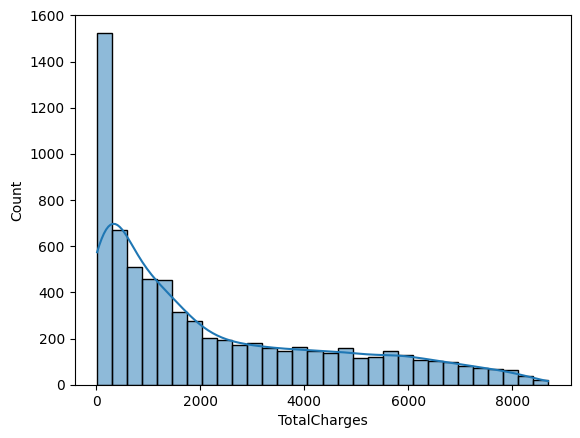

In [27]:
# Menampilkan histogram untuk menentukan metode imputate
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(Telco_dataset['TotalCharges'], bins=30, kde=True)
plt.show()


##### Berdasarkan histogram yang telah ditampilkan menggambarkan right skewed yang dimana bisa dikatakan data akan diisi dengan imputate median. Hal ini dikatakan karena data tidak berdistribusi normal dan memiliki outlier. Lalu median digunakan karena median lebih tahan terhadap outlier dibanding metode imputate yang lain


#### Mengisi Nan dengan menggunakan imputate median

In [28]:
Total_median = Telco_dataset['TotalCharges'].median()
print(Total_median)

1397.475


In [29]:
# mengisi nilai Nan dengan median yang didapat
Telco_dataset['TotalCharges'] = Telco_dataset['TotalCharges'].fillna(Total_median)
jumlah_missvalue = Telco_dataset['TotalCharges'].isna().sum()
print(f"jumlah missing value setelah dilakukan imputate adalah {jumlah_missvalue}")

jumlah missing value setelah dilakukan imputate adalah 0


#### e.) Scaller dengan StandarScaller dan MinMaxScaller

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Standar = StandardScaler()
Minmax = MinMaxScaler()

# Scaler menggunakan Standardscaler dan minmaxscaler
Telco_dataset['Standard'] = Standar.fit_transform(Telco_dataset[['TotalCharges']])
Telco_dataset['MinMax'] = Minmax.fit_transform(Telco_dataset[['TotalCharges']])

#### f.) Perbandingan standardscaler dan minmaxscaler

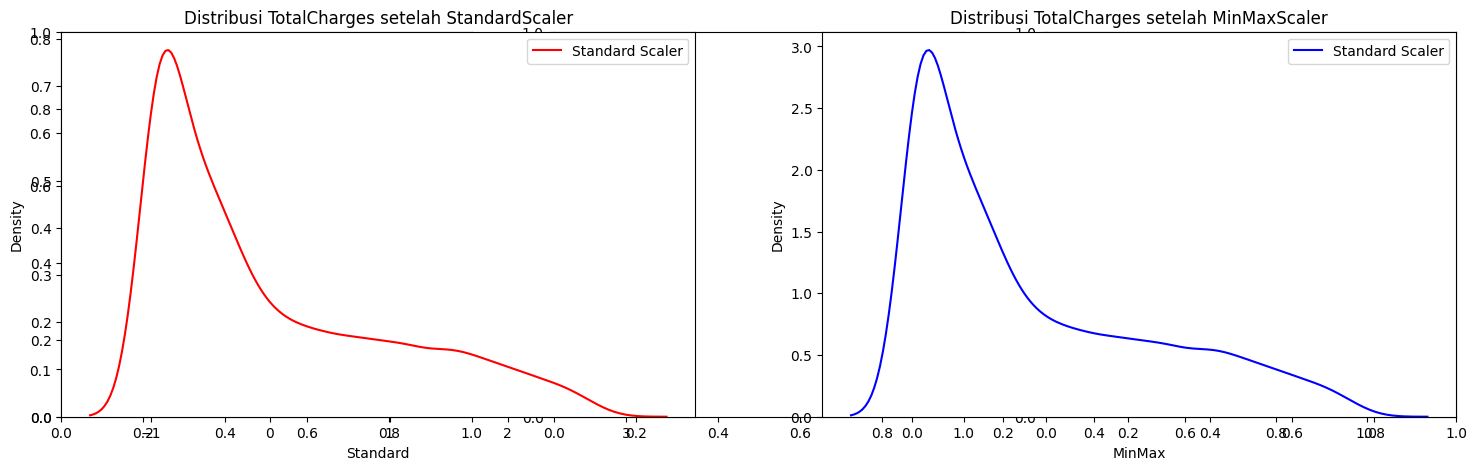

In [31]:
# Plot perbandingan
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot Standard Scaler
gplt1 = plt.subplot(1, 2, 1)
sns.kdeplot(Telco_dataset['Standard'], label='Standard Scaler', color='red')
plt.title('Distribusi TotalCharges setelah StandardScaler')
plt.legend()

# Plot MinMax Scaler
gplt2 = plt.subplot(1, 2, 2)
sns.kdeplot(Telco_dataset['MinMax'], label='Standard Scaler', color='blue')
plt.title('Distribusi TotalCharges setelah MinMaxScaler')
plt.legend()

plt.show()

#### g.) Analisis hasil
##### Pada assignment 4 ini core nya adalah mengatasi missing value dengan imputate median, lalu dilakukan scaler menggunakan minmaxscaler dan standardscaler untuk menyamakan fitur. Namun, setelah dilakukan scaler, dataset masih memiliki outlier yang dapat dilihat dari plot hasil distribusi. Meskipun telah dilakukan scaler, plot tetap menunjukkan adanya outlier yaitu dari kedua plot menunjukkan skewed seperti plot histogram awal sebelum dilakukan scaler.